<img src="https://certificate.tpq.io/taim_logo.png" width="350px" align="right">

# Artificial Intelligence in Finance

## Recurrent Neural Networks

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## First Example

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from pprint import pprint
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('display.precision', 4)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

In [4]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds()

In [5]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
a = a.reshape((len(a), -1))

In [7]:
a.shape

(100, 1)

In [7]:
a[:5]
pprint(a)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [8]:
#from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence  import TimeseriesGenerator

In [10]:
lags = 3

In [11]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [12]:
pprint(list(g)[0])

: 

In [23]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [2]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu',
                    input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adagrad', loss='mse',
              metrics=['mae'])

NameError: name 'lags' is not defined

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [15]:
%%time
model.fit(g, epochs=1000, steps_per_epoch=5,
            verbose=False)

CPU times: user 10.5 s, sys: 1.02 s, total: 11.5 s
Wall time: 9.94 s


In [16]:
res = pd.DataFrame(model.history.history)

In [17]:
res.tail(3)

,loss,mae
997,1.1002,0.9686
998,1.1798,0.9570
999,0.3098,0.5181


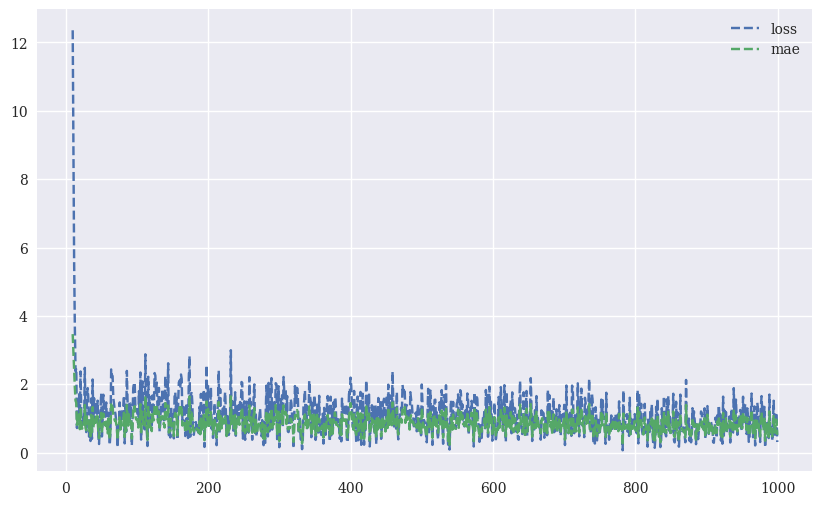

In [18]:
res.iloc[10:].plot(figsize=(10, 6), style=['--', '--']);

In [19]:
x = np.array([21, 22, 23]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

23

In [20]:
x = np.array([87, 88, 89]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

91

In [21]:
x = np.array([187, 188, 189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

193

In [22]:
x = np.array([1187, 1188, 1189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

1220

## Second Example

In [23]:
def transform(x):
    y = 0.05 * x ** 2 + 0.2 * x + np.sin(x) + 5
    y += np.random.standard_normal(len(x)) * 0.2
    return y

In [24]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
a = transform(x)

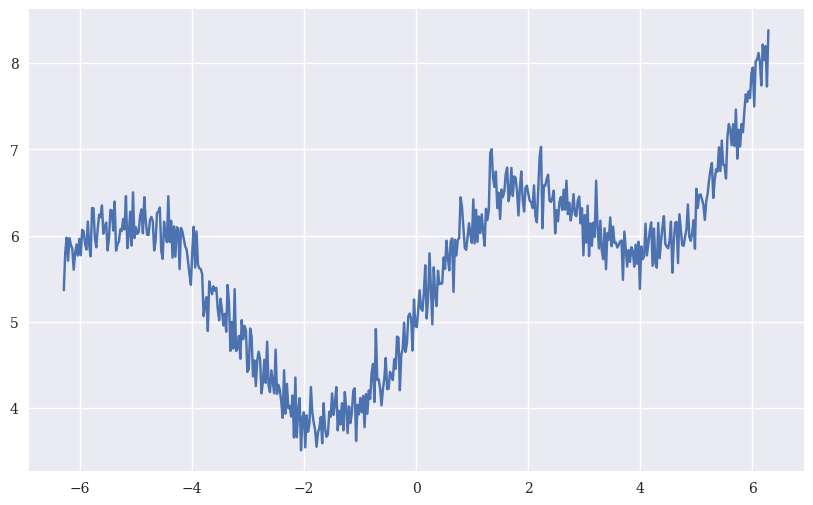

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x, a);

In [26]:
a = a.reshape((len(a), -1))

In [27]:
a[:5]

array([[5.3673],
       [5.8002],
       [5.9768],
       [5.7102],
       [5.9715]])

In [28]:
lags = 5

In [29]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [30]:
model = Sequential()
model.add(SimpleRNN(500, activation='relu', input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 500)               251000    
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 251,501
Trainable params: 251,501
Non-trainable params: 0
_________________________________________________________________


In [32]:
%%time
model.fit(g, epochs=500,
          steps_per_epoch=10,
          verbose=False)

CPU times: user 31.2 s, sys: 12.2 s, total: 43.5 s
Wall time: 20.9 s


In [33]:
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
d = transform(x)

In [34]:
g_ = TimeseriesGenerator(d, d, length=lags, batch_size=len(d))

In [35]:
f = list(g_)[0][0].reshape((len(d) - lags, lags, 1))

In [36]:
y = model.predict(f, verbose=False)

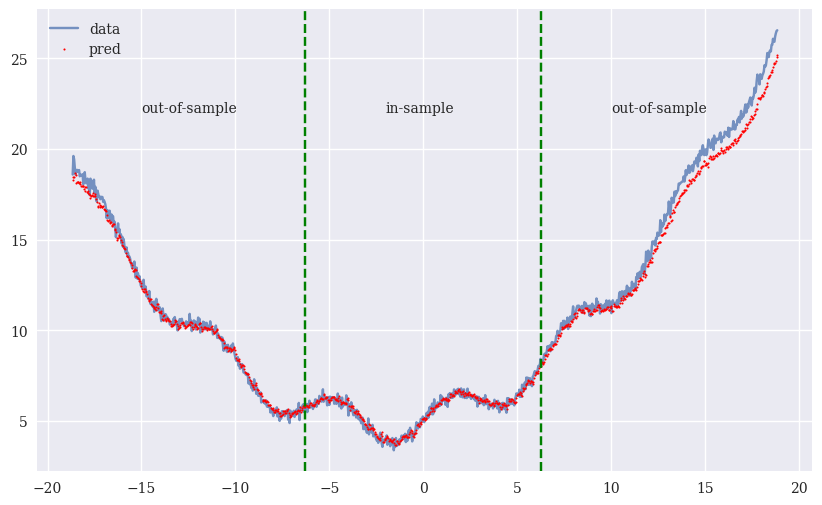

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(x[lags:], d[lags:], label='data', alpha=0.75)
plt.plot(x[lags:], y, 'r.', label='pred', ms=3)
plt.axvline(-2 * np.pi, c='g', ls='--')
plt.axvline(2 * np.pi, c='g', ls='--')
plt.text(-15, 22, 'out-of-sample')
plt.text(-2, 22, 'in-sample')
plt.text(10, 22, 'out-of-sample')
plt.legend();

## Financial Price Series

In [9]:
url = 'http://hilpisch.com/aiif_eikon_id_eur_usd.csv'

In [10]:
symbol = 'EUR_USD'

In [11]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)

In [12]:
def generate_data():
    data = pd.DataFrame(raw['CLOSE'])
    data.columns = [symbol]
    data = data.resample('30min', label='right').last().ffill()
    return data

In [19]:
data = generate_data()
pprint(data[:5])

                     EUR_USD
Date                        
2019-10-01 00:30:00   1.0899
2019-10-01 01:00:00   1.0896
2019-10-01 01:30:00   1.0892
2019-10-01 02:00:00   1.0890
2019-10-01 02:30:00   1.0886


In [14]:
data = (data - data.mean()) / data.std()

In [16]:
p = data[symbol].values
pprint(p)

array([-2.7112, -2.7583, -2.8211, ...,  2.1877,  2.1877,  2.1877])


In [17]:
p = p.reshape((len(p), -1))

In [18]:
lags = 5

In [20]:
g = TimeseriesGenerator(p, p, length=lags, batch_size=5)

In [21]:
def create_rnn_model(hu=100, lags=lags, layer='SimpleRNN',
                           features=1, algorithm='estimation'):
    model = Sequential()
    if layer == 'SimpleRNN':
        model.add(SimpleRNN(hu, activation='relu',
                            input_shape=(lags, features)))
    else:
        model.add(LSTM(hu, activation='relu',
                       input_shape=(lags, features)))
    if algorithm == 'estimation':
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    else:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy'])
    return model

In [24]:
model = create_rnn_model()

2025-02-16 15:32:19.796628: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/codespace/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10,
          verbose=False)

/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


CPU times: user 13.2 s, sys: 840 ms, total: 14 s
Wall time: 10.4 s


In [26]:
y = model.predict(g, verbose=False)

In [27]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()

/tmp/ipykernel_6823/2536540008.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['pred'].iloc[lags:] = y.flatten()


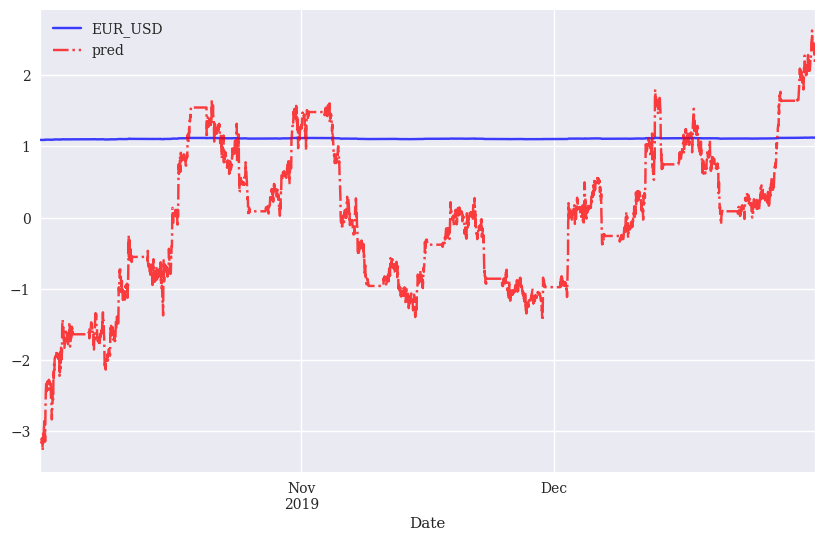

In [28]:
data[[symbol, 'pred']].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

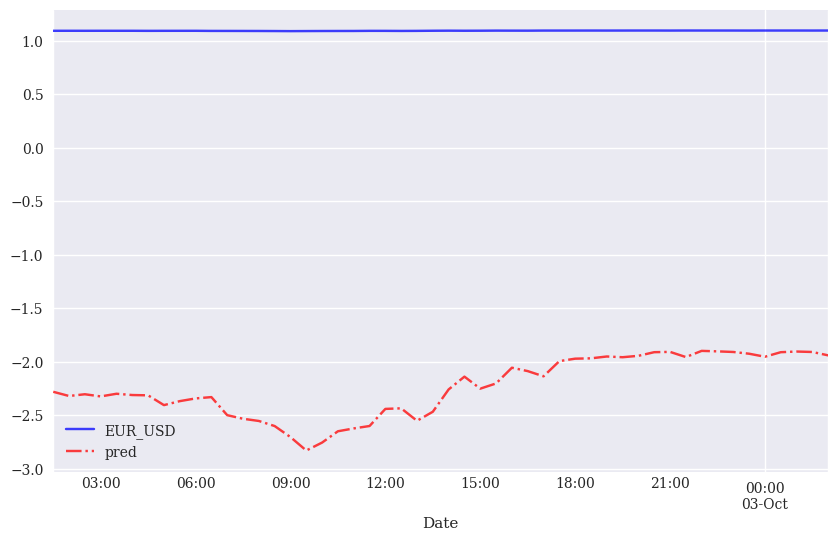

In [29]:
data[[symbol, 'pred']].iloc[50:100].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

## Financial Return Series 

In [30]:
data = generate_data()

In [31]:
data['r'] = np.log(data / data.shift(1))

In [32]:
data.dropna(inplace=True)

In [33]:
data = (data - data.mean()) / data.std()

In [34]:
r = data['r'].values

In [35]:
r = r.reshape((len(r), -1))

In [36]:
g = TimeseriesGenerator(r, r, length=lags, batch_size=5)

In [62]:
# list(g)[0]

In [37]:
model = create_rnn_model()

/home/codespace/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10,
          verbose=False)

/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


CPU times: user 13.4 s, sys: 871 ms, total: 14.2 s
Wall time: 10.8 s


In [39]:
y = model.predict(g, verbose=False)

In [40]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()
data.dropna(inplace=True)

/tmp/ipykernel_6823/4192861294.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['pred'].iloc[lags:] = y.flatten()


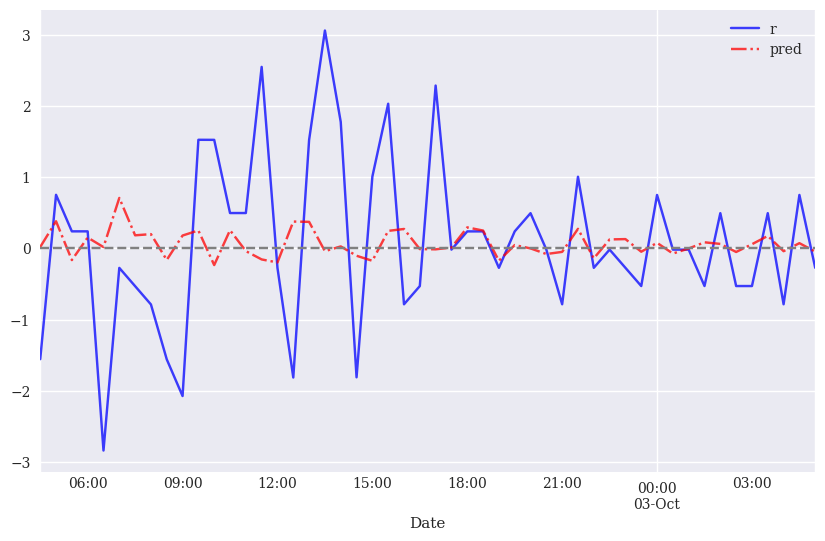

In [41]:
data[['r', 'pred']].iloc[50:100].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);
plt.axhline(0, c='grey', ls='--');

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(np.sign(data['r']), np.sign(data['pred']))

0.6566114765252892

In [44]:
split = int(len(r) * 0.8)

In [45]:
train = r[:split]

In [46]:
test = r[split:]

In [47]:
g = TimeseriesGenerator(train, train, length=lags, batch_size=5)

In [48]:
set_seeds()
model = create_rnn_model(hu=100)

/home/codespace/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
%%time
model.fit(g, epochs=100, steps_per_epoch=10, verbose=False)

/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


CPU times: user 3.43 s, sys: 319 ms, total: 3.75 s
Wall time: 3.02 s


In [50]:
g_ = TimeseriesGenerator(test, test, length=lags, batch_size=5)

In [51]:
y = model.predict(g_)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [78]:
accuracy_score(np.sign(test[lags:]), np.sign(y))

0.6753986332574032

## Financial Features

In [52]:
data = generate_data()

In [53]:
data['r'] = np.log(data / data.shift(1))

In [54]:
window = 20
data['mom'] = data['r'].rolling(window).mean()
data['vol'] = data['r'].rolling(window).std()

In [56]:
data.dropna(inplace=True)
pprint(data[:5])

                     EUR_USD           r         mom     vol
Date                                                        
2019-10-01 10:30:00   1.0900  7.3421e-04  4.5874e-06  0.0004
2019-10-01 11:00:00   1.0899 -9.1747e-05  1.3765e-05  0.0004
2019-10-01 11:30:00   1.0905  5.5036e-04  5.9641e-05  0.0004
2019-10-01 12:00:00   1.0899 -5.5036e-04  4.1305e-05  0.0004
2019-10-01 12:30:00   1.0893 -5.5066e-04  3.2141e-05  0.0004


### Estimation

In [57]:
split = int(len(data) * 0.8)

In [58]:
train = data.iloc[:split].copy()

In [59]:
mu, std = train.mean(), train.std()

In [60]:
train = (train - mu) / std

In [61]:
test = data.iloc[split:].copy()

In [62]:
test = (test - mu) / std

In [63]:
g = TimeseriesGenerator(train.values, train['r'].values,
                        length=lags, batch_size=5)

In [64]:
set_seeds()
model = create_rnn_model(hu=100, features=len(data.columns),
                         layer='SimpleRNN')

/home/codespace/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
%%time
model.fit(g, epochs=100, steps_per_epoch=10,
                verbose=False)

/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


CPU times: user 3.54 s, sys: 319 ms, total: 3.86 s
Wall time: 3.39 s


In [66]:
g_ = TimeseriesGenerator(test.values, test['r'].values,
                         length=lags, batch_size=5)

In [67]:
y = model.predict(g_).flatten()

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [68]:
accuracy_score(np.sign(test['r'].iloc[lags:]), np.sign(y))

0.36155606407322655

### Classification

In [69]:
set_seeds()
model = create_rnn_model(hu=50,
            features=len(data.columns),
            layer='LSTM',
            algorithm='classification')

/home/codespace/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
train_y = np.where(train['r'] > 0, 1, 0)

In [71]:
np.bincount(train_y)

array([2374, 1142])

In [72]:
def cw(a):
    c0, c1 = np.bincount(a)
    w0 = (1 / c0) * (len(a)) / 2
    w1 = (1 / c1) * (len(a)) / 2
    return {0: w0, 1: w1}

In [73]:
g = TimeseriesGenerator(train.values, train_y,
                        length=lags, batch_size=5)

In [74]:
%%time
model.fit(g, epochs=5, steps_per_epoch=10,
          verbose=False, class_weight=cw(train_y))

/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


CPU times: user 1.38 s, sys: 206 ms, total: 1.58 s
Wall time: 1.58 s


In [75]:
test_y = np.where(test['r'] > 0, 1, 0)

In [76]:
g_ = TimeseriesGenerator(test.values, test_y,
                         length=lags, batch_size=5)

In [77]:
y = np.where(model.predict(g_, batch_size=None) > 0.5,
             1, 0).flatten()

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [78]:
np.bincount(y)

array([511, 363])

In [79]:
accuracy_score(test_y[lags:], y)

0.6167048054919908

### Deep RNNs

In [80]:
from keras.layers import Dropout

In [81]:
def create_deep_rnn_model(hl=2, hu=100, layer='SimpleRNN',
                          optimizer='rmsprop', features=1,
                          dropout=False, rate=0.3, seed=100):
    if hl <= 2: hl = 2
    if layer == 'SimpleRNN':
        layer = SimpleRNN
    else:
        layer = LSTM
    model = Sequential()
    model.add(layer(hu, input_shape=(lags, features),
                     return_sequences=True,
                    ))
    if dropout:
        model.add(Dropout(rate, seed=seed))
    for _ in range(2, hl):
        model.add(layer(hu, return_sequences=True))
        if dropout:
            model.add(Dropout(rate, seed=seed))
    model.add(layer(hu))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [82]:
set_seeds()
model = create_deep_rnn_model(
            hl=2, hu=50, layer='SimpleRNN',
            features=len(data.columns),
            dropout=True, rate=0.3)

/home/codespace/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 5, 50)          │         2,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,851 (30.67 KB)

 Trainable params: 7,851 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
%%time
model.fit(g, epochs=200, steps_per_epoch=10,
          verbose=False, class_weight=cw(train_y))

/home/codespace/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


CPU times: user 8.74 s, sys: 589 ms, total: 9.33 s
Wall time: 6.86 s


In [85]:
y = np.where(model.predict(g_, batch_size=None) > 0.5,
             1, 0).flatten()

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [86]:
np.bincount(y)

array([451, 423])

In [87]:
accuracy_score(test_y[lags:], y)

0.6350114416475973

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>